<a href="https://colab.research.google.com/github/imankassim/Deodorant_Likeability_Logistic_regression/blob/master/DeodrantLikeability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deodrant likeability**

Which deodorant is preferred out of 2?

Data on many different deodorants and opinions is used to find out which of only two deodorants are preferred.

# Import libraries

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

# Read data

The dataset is stored on AWS in an S3 bucket.

In [ ]:
data= pd.read_csv('https://deodorant-likeability-logrerg.s3.eu-west-2.amazonaws.com/deodrant_likeability.csv', header=0)
#data=data.dropna()
data.shape
list(data.columns)

['Respondent.ID',
 'Product.ID',
 'Product',
 'q1_1.personal.opinion.of.this.Deodorant',
 'q2_all.words',
 'q3_1.strength.of.the.Deodorant',
 'q4_1.artificial.chemical',
 'q4_2.attractive',
 'q4_3.bold',
 'q4_4.boring',
 'q4_5.casual',
 'q4_6.cheap',
 'q4_7.clean',
 'q4_8.easy.to.wear',
 'q4_9.elegant',
 'q4_10.feminine',
 'q4_11.for.someone.like.me',
 'q4_12.heavy',
 'q4_13.high.quality',
 'q4_14.long.lasting',
 'q4_15.masculine',
 'q4_16.memorable',
 'q4_17.natural',
 'q4_18.old.fashioned',
 'q4_19.ordinary',
 'q4_20.overpowering',
 'q4_21.sharp',
 'q4_22.sophisticated',
 'q4_23.upscale',
 'q4_24.well.rounded',
 'q5_1.Deodorant.is.addictive',
 'q7',
 'q8.1',
 'q8.2',
 'q8.5',
 'q8.6',
 'q8.8',
 'q8.11',
 'q8.12',
 'q8.13',
 'q8.19',
 'q8.20',
 'q9.how.likely.would.you.be.to.purchase.this.Deodorant',
 'q10.prefer.this.Deodorant.or.your.usual.Deodorant',
 'q11.time.of.day.would.this.Deodorant.be.appropriate',
 'q12.which.occasions.would.this.Deodorant.be.appropriate',
 'Q13_Liking.afte

I don't need all of these columns, so I'll get rid of the ones that aren't useful


In [ ]:
data=data.drop(columns=['Respondent.ID', 'q4_23.upscale','q4_18.old.fashioned','q4_15.masculine','q9.how.likely.would.you.be.to.purchase.this.Deodorant','q10.prefer.this.Deodorant.or.your.usual.Deodorant', 'q11.time.of.day.would.this.Deodorant.be.appropriate', 'q12.which.occasions.would.this.Deodorant.be.appropriate', 'Q13_Liking.after.30.minutes', 'q14.Deodorant.overall.on.a.scale.from.1.to.10', 'q4_12.heavy', 'q4_10.feminine','Product.ID','q2_all.words','q7','q8.1','q8.2', 'q8.5', 'q8.6', 'q8.8', 'q8.11', 'q8.12', 'q8.13', 'q8.19', 'q8.20','ValSegb','s7.involved.in.the.selection.of.the.cosmetic.products','s13.2','s13a.b.most.often', 's13b.bottles.of.Deodorant.do.you.currently.own'])

In [ ]:
data.shape
list(data.columns)

['Product',
 'q1_1.personal.opinion.of.this.Deodorant',
 'q3_1.strength.of.the.Deodorant',
 'q4_1.artificial.chemical',
 'q4_2.attractive',
 'q4_3.bold',
 'q4_4.boring',
 'q4_5.casual',
 'q4_6.cheap',
 'q4_7.clean',
 'q4_8.easy.to.wear',
 'q4_9.elegant',
 'q4_11.for.someone.like.me',
 'q4_13.high.quality',
 'q4_14.long.lasting',
 'q4_16.memorable',
 'q4_17.natural',
 'q4_19.ordinary',
 'q4_20.overpowering',
 'q4_21.sharp',
 'q4_22.sophisticated',
 'q4_24.well.rounded',
 'q5_1.Deodorant.is.addictive',
 's8.ethnic.background',
 's9.education',
 's10.income',
 's11.marital.status',
 's12.working.status']

Calculate averages of positive columns and negative columns

In [ ]:
pos_cols=['q3_1.strength.of.the.Deodorant','q4_2.attractive', 'q4_3.bold','q4_5.casual','q4_6.cheap','q4_7.clean','q4_8.easy.to.wear','q4_9.elegant','q4_11.for.someone.like.me','q4_13.high.quality', 'q4_14.long.lasting','q4_16.memorable', 'q4_17.natural','q4_21.sharp','q4_22.sophisticated','q4_24.well.rounded','q5_1.Deodorant.is.addictive',]
neg_cols=['q4_18.old.fashioned','q4_19.ordinary','q4_20.overpowering',]
data['pos_average'] = data[pos_cols].astype(int).mean(axis=1)
data['neg_average'] = data[pos_cols].astype(int).mean(axis=1)

In [ ]:
data.shape
list(data.columns)

['Product',
 'q1_1.personal.opinion.of.this.Deodorant',
 'q3_1.strength.of.the.Deodorant',
 'q4_1.artificial.chemical',
 'q4_2.attractive',
 'q4_3.bold',
 'q4_4.boring',
 'q4_5.casual',
 'q4_6.cheap',
 'q4_7.clean',
 'q4_8.easy.to.wear',
 'q4_9.elegant',
 'q4_11.for.someone.like.me',
 'q4_13.high.quality',
 'q4_14.long.lasting',
 'q4_16.memorable',
 'q4_17.natural',
 'q4_19.ordinary',
 'q4_20.overpowering',
 'q4_21.sharp',
 'q4_22.sophisticated',
 'q4_24.well.rounded',
 'q5_1.Deodorant.is.addictive',
 's8.ethnic.background',
 's9.education',
 's10.income',
 's11.marital.status',
 's12.working.status',
 'pos_average',
 'neg_average']

In [ ]:
data=data.drop(columns=['q1_1.personal.opinion.of.this.Deodorant', 's12.working.status','q3_1.strength.of.the.Deodorant','q4_1.artificial.chemical', 'q4_2.attractive', 'q4_3.bold', 'q4_4.boring', 'q4_5.casual', 'q4_6.cheap','q4_7.clean', 'q4_8.easy.to.wear', 'q4_9.elegant', 'q4_11.for.someone.like.me', 'q4_13.high.quality', 'q4_14.long.lasting', 'q4_16.memorable', 'q4_17.natural','q4_19.ordinary', 'q4_20.overpowering','q4_21.sharp', 'q4_22.sophisticated', 'q4_24.well.rounded', 'q5_1.Deodorant.is.addictive'])

In [ ]:
data.shape
list(data.columns)

['Product',
 's8.ethnic.background',
 's9.education',
 's10.income',
 's11.marital.status',
 'pos_average',
 'neg_average']

I have renamed some columns, so they are easier to recognise.

In [ ]:
data=data.rename(columns={"s8.ethnic.background": "Ethnicity", "s9.education": "Education", "s10.income": "Income", "s11.marital.status": "Relationship_status"})

What the data stands for:

Ethnicity: 1=White, 2=Black 3=Asian 4=Mixed 5=Other

Education: 2=No formal qualifications, 3=Secondary, 4=College, 5=Bachelors, 6=Masters, 7=phD

Income: income x 10,000 (To nearest 10,000)

Relationship_status: 1=Single, 2=In a relationship (not co-habiting), 3=Married, 4=Divorced/Widowed 5=In a relationship (co-habiting)

The dataset contains information about many different deodorants, however I want to find which is preferred out of only two types of deodorant.

The two I have chosen are 'Deodorant B' (Sure invisible anti-persperant) and 'Deodorant J' (Lynx Africa)


In [ ]:
#data=data.loc[(data['Product'] == 'Deodorant B'|'Deodorant C')]
array = ['Deodorant B', 'Deodorant J']
data=data.loc[data['Product'].isin(array)]

In [ ]:
data.Product.unique()

array(['Deodorant B', 'Deodorant J'], dtype=object)

# DATA EXPLORATION

Below are some analysis of the data.

In [ ]:
data['Product'].value_counts()

Deodorant J    1022
Deodorant B    1021
Name: Product, dtype: int64

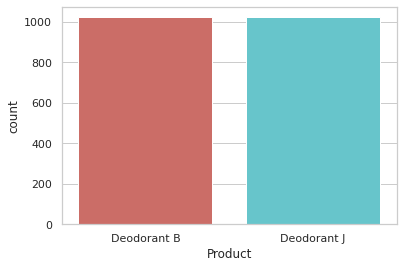

<Figure size 432x288 with 0 Axes>

In [ ]:
sns.countplot(x='Product', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

In [ ]:
#calculates averages for ALL records, split by Product
data.groupby('Product').mean()

,Ethnicity,Education,Income,Relationship_status,pos_average,neg_average
Product,,,,,,
Deodorant B,1.655240,3.312439,4.891283,1.729677,3.528490,3.528490
Deodorant J,1.636008,3.242661,4.970646,1.748532,3.515483,3.515483


In [ ]:
#calculates MODE (most common) for ALL records, split by Product
data.groupby('Product').agg(pd.Series.mode)

,Ethnicity,Education,Income,Relationship_status,pos_average,neg_average
Product,,,,,,
Deodorant B,1,3,4,2,3.411765,3.411765
Deodorant J,1,3,3,2,3.588235,3.588235


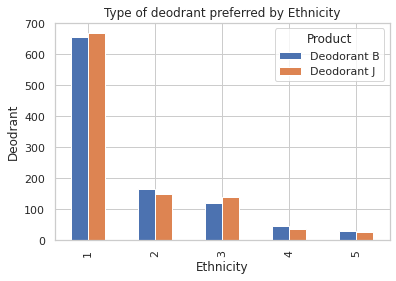

In [ ]:
pd.crosstab(data.Ethnicity,data.Product).plot(kind='bar')
plt.title('Type of deodrant preferred by Ethnicity')
plt.xlabel('Ethnicity')
plt.ylabel('Deodrant')
plt.savefig('deo_eth')

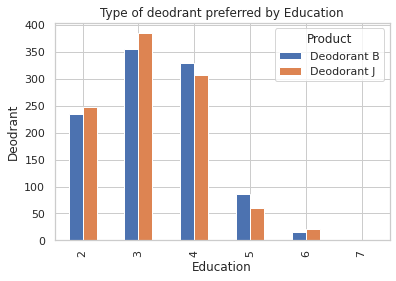

In [ ]:
pd.crosstab(data.Education,data.Product).plot(kind='bar')
plt.title('Type of deodrant preferred by Education')
plt.xlabel('Education')
plt.ylabel('Deodrant')
plt.savefig('deo_edu')

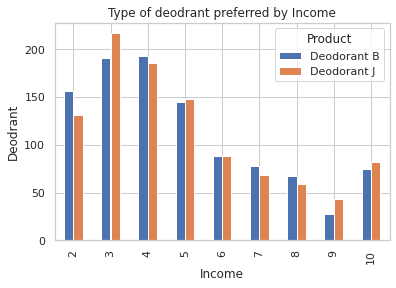

In [ ]:
pd.crosstab(data.Income,data.Product).plot(kind='bar')
plt.title('Type of deodrant preferred by Income')
plt.xlabel('Income')
plt.ylabel('Deodrant')
plt.savefig('deo_inc')

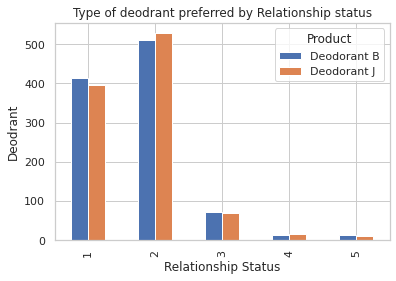

In [ ]:
pd.crosstab(data.Relationship_status,data.Product).plot(kind='bar')
plt.title('Type of deodrant preferred by Relationship status')
plt.xlabel('Relationship Status')
plt.ylabel('Deodrant')
plt.savefig('deo_rs')

# CREATE DUMMY VARIABLES

Variables with only 2 values (0 and 1) - this allows us to use a single regression equation instead of a multi-regression equation - keeping it simpler!



In [ ]:
list(data.columns)

['Product',
 'Ethnicity',
 'Education',
 'Income',
 'Relationship_status',
 'pos_average',
 'neg_average']

Here I also replaced Deodorant B with 0
and Deodrant J with 1

In [ ]:
#data.Product.unique()
data=data.replace('Deodorant B', 0)
data=data.replace('Deodorant J', 1)
data.Product.unique()

array([0, 1])

In [ ]:
data=data.round({'pos_average': 0, 'neg_average': 0})

cat_vars=['Ethnicity', 'Education', 'Income', 'Relationship_status', 'pos_average', 'neg_average']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['Ethnicity', 'Education', 'Income', 'Relationship_status', 'pos_average', 'neg_average']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [ ]:
#final data columns:
data_final=data[to_keep]
data_final.columns.values


array(['Product', 'Ethnicity_1', 'Ethnicity_2', 'Ethnicity_3',
       'Ethnicity_4', 'Ethnicity_5', 'Education_2', 'Education_3',
       'Education_4', 'Education_5', 'Education_6', 'Education_7',
       'Income_2', 'Income_3', 'Income_4', 'Income_5', 'Income_6',
       'Income_7', 'Income_8', 'Income_9', 'Income_10',
       'Relationship_status_1', 'Relationship_status_2',
       'Relationship_status_3', 'Relationship_status_4',
       'Relationship_status_5', 'pos_average_1.0', 'pos_average_2.0',
       'pos_average_3.0', 'pos_average_4.0', 'pos_average_5.0',
       'neg_average_1.0', 'neg_average_2.0', 'neg_average_3.0',
       'neg_average_4.0', 'neg_average_5.0'], dtype=object)

# Oversampling using SMOTE

SMOTE, which stands for 'synthetic minority oversampling technique' is used to balance class distribution to solve imbalance problems in the data. It is one of the most common types of oversampling used.


In [ ]:
X = data_final.loc[:, data_final.columns != 'Product']
y = data_final.loc[:, data_final.columns == 'Product']
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['Product'])

print("length of oversampled data is ",len(os_data_X))



length of oversampled data is  1448


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Recursive Feature Elimination

RFE is a feature selection method that fits a model, and removes the weakest features. This allows for the elimination of dependencies and collinearity in the data.

In [ ]:
data_final_vars=data_final.columns.values.tolist()
y=['Product']
X=[i for i in data_final_vars if i not in y]
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
rfe = RFE(logreg, 20)
rfe = rfe.fit(os_data_X, os_data_y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False  True  True  True  True  True  True  True
 False False False False False False  True False  True  True  True False
  True False  True  True False  True False  True False False  True]
[ 1  1 11  1 13  1  1  1  1  1  1  1  8  2  3  6  7  5  1  4  1  1  1  9
  1 16  1  1 12  1 15  1 10 14  1]


The results of the RFE show which columns I should be using.

Columns to use are:
- Product
- Ethnicity_1, Ethnicity_3, Ethnicity_5
- Education_2, Education_3, Education_4, Education_5, Education_6, Education_7
- Income_8, Income_10
- Relationship_status_1, Relationship_status_2, Relationship_status_4
- pos_average_1.0, pos_average_2.0, pos_average_4.0
- neg_average_1.0, neg_average_4.0



# IMPLEMENTING THE MODEL

In [ ]:
#did this furrther up instead
#data_final["Product"].replace({"Deodorant B": 0, "Deodorant J": 1}, inplace=True)

data_final


,Product,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Education_2,Education_3,Education_4,Education_5,Education_6,Education_7,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,Income_9,Income_10,Relationship_status_1,Relationship_status_2,Relationship_status_3,Relationship_status_4,Relationship_status_5,pos_average_1.0,pos_average_2.0,pos_average_3.0,pos_average_4.0,pos_average_5.0,neg_average_1.0,neg_average_2.0,neg_average_3.0,neg_average_4.0,neg_average_5.0
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
3,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
5101,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
5102,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0
5103,1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
#data_final=data_final.astype('float64').dtypes
data_final.dtypes

Product                  int64
Ethnicity_1              uint8
Ethnicity_2              uint8
Ethnicity_3              uint8
Ethnicity_4              uint8
Ethnicity_5              uint8
Education_2              uint8
Education_3              uint8
Education_4              uint8
Education_5              uint8
Education_6              uint8
Education_7              uint8
Income_2                 uint8
Income_3                 uint8
Income_4                 uint8
Income_5                 uint8
Income_6                 uint8
Income_7                 uint8
Income_8                 uint8
Income_9                 uint8
Income_10                uint8
Relationship_status_1    uint8
Relationship_status_2    uint8
Relationship_status_3    uint8
Relationship_status_4    uint8
Relationship_status_5    uint8
pos_average_1.0          uint8
pos_average_2.0          uint8
pos_average_3.0          uint8
pos_average_4.0          uint8
pos_average_5.0          uint8
neg_average_1.0          uint8
neg_aver

In [ ]:
data_final.corr()

,Product,Ethnicity_1,Ethnicity_2,Ethnicity_3,Ethnicity_4,Ethnicity_5,Education_2,Education_3,Education_4,Education_5,Education_6,Education_7,Income_2,Income_3,Income_4,Income_5,Income_6,Income_7,Income_8,Income_9,Income_10,Relationship_status_1,Relationship_status_2,Relationship_status_3,Relationship_status_4,Relationship_status_5,pos_average_1.0,pos_average_2.0,pos_average_3.0,pos_average_4.0,pos_average_5.0,neg_average_1.0,neg_average_2.0,neg_average_3.0,neg_average_4.0,neg_average_5.0
Product,1.000000,0.010613,-0.021868,0.027673,-0.027373,-0.005978,0.014726,0.030183,-0.022519,-0.049540,0.018286,-0.000015,-0.035414,0.031589,-0.009048,0.003989,-0.000150,-0.019137,-0.016403,0.039995,0.012723,-0.017411,0.017126,-0.005926,0.016217,-0.004507,-0.022140,0.016782,-0.013249,0.011254,-0.006725,-0.022140,0.016782,-0.013249,0.011254,-0.006725
Ethnicity_1,0.010613,1.000000,-0.581090,-0.519891,-0.279548,-0.232209,0.019440,-0.033983,0.015205,-0.018663,0.038468,0.023043,0.035006,-0.011825,-0.036406,0.029173,0.025045,-0.002743,-0.015846,-0.005864,-0.018566,0.002763,0.001638,-0.009895,0.030201,-0.029971,0.016290,0.007411,0.039955,-0.037865,-0.029899,0.016290,0.007411,0.039955,-0.037865,-0.029899
Ethnicity_2,-0.021868,-0.581090,1.000000,-0.163706,-0.088025,-0.073119,-0.023605,0.055034,-0.042453,0.023214,-0.017490,-0.013390,-0.028795,-0.013907,0.015247,0.014214,0.008574,0.017959,-0.002752,0.022306,-0.021772,0.002403,0.006628,0.001019,-0.040966,0.001639,-0.009466,0.007790,-0.023635,0.021337,0.005523,-0.009466,0.007790,-0.023635,0.021337,0.005523
Ethnicity_3,0.027673,-0.519891,-0.163706,1.000000,-0.078755,-0.065418,-0.018833,0.001411,0.017793,0.001981,-0.007993,-0.011980,-0.023906,0.003215,0.017282,-0.005990,-0.018210,0.007673,0.011600,-0.032588,0.032716,-0.022044,0.001150,0.023062,-0.010150,0.050764,-0.008469,-0.007278,-0.021734,0.019034,0.031954,-0.008469,-0.007278,-0.021734,0.019034,0.031954
Ethnicity_4,-0.027373,-0.279548,-0.088025,-0.078755,1.000000,-0.035176,0.002680,-0.020962,0.022056,0.010284,-0.027948,-0.006442,0.016697,0.039842,0.016600,-0.055908,-0.027837,-0.047464,0.029693,0.015101,0.005787,0.010814,-0.005804,-0.026686,0.036714,-0.000353,-0.004554,-0.024258,-0.033378,0.036359,0.018739,-0.004554,-0.024258,-0.033378,0.036359,0.018739
Ethnicity_5,-0.005978,-0.232209,-0.073119,-0.065418,-0.035176,1.000000,0.030179,-0.000051,-0.013260,-0.013099,-0.023215,-0.005351,-0.009735,0.010446,0.016986,-0.036309,-0.020972,0.009783,-0.007070,0.015839,0.028137,0.018276,-0.014552,0.011593,-0.020868,-0.019026,-0.003783,0.005199,0.019964,-0.019087,-0.012577,-0.003783,0.005199,0.019964,-0.019087,-0.012577
Education_2,0.014726,0.019440,-0.023605,-0.018833,0.002680,0.030179,1.000000,-0.418192,-0.373516,-0.153948,-0.075365,-0.017371,0.041267,-0.005941,0.037898,0.003346,-0.038803,-0.010632,-0.012782,0.001788,-0.043158,0.010688,0.012958,-0.041858,-0.010197,0.001197,0.039879,-0.025723,-0.006041,-0.002272,0.085292,0.039879,-0.025723,-0.006041,-0.002272,0.085292
Education_3,0.030183,-0.033983,0.055034,0.001411,-0.020962,-0.000051,-0.418192,1.000000,-0.507248,-0.209067,-0.102348,-0.023591,0.020647,0.056596,-0.042648,-0.003278,-0.002720,0.020229,-0.032338,-0.020668,-0.018610,0.002020,-0.008100,0.007746,-0.024268,0.036539,-0.016677,-0.027521,-0.002210,0.011371,-0.013698,-0.016677,-0.027521,-0.002210,0.011371,-0.013698
Education_4,-0.022519,0.015205,-0.042453,0.017793,0.022056,-0.013260,-0.373516,-0.507248,1.000000,-0.186732,-0.091414,-0.021070,-0.062295,-0.042853,0.015846,0.001940,0.023062,-0.010346,0.029490,0.010745,0.071600,-0.015650,0.007092,0.020996,0.032030,-0.046085,-0.014895,0.056982,-0.003302,-0.002069,-0.049524,-0.014895,0.056982,-0.003302,-0.002069,-0.049524
Education_5,-0.049540,-0.018663,0.023214,0.001981,0.010284,-0.013099,-0.153948,-0.209067,-0.186732,1.000000,-0.037677,-0.008684,0.008148,-0.015006,-0.005302,-0.005090,0.016405,0.004177,0.031560,-0.000767,-0.022970,0.004608,-0.008283,0.006924,0.013524,-0.013595,-0.006139,-0.000016,-0.002034,0.005299,-0.0

Fitting to the model:

Changes I made are expanding the maxiter to 100,000 (It doesn't need to be that large, however I wanted to ensure it would iterate through all data, as it wasn't before). I also chose the 'Nelder-Mead' method (shown as 'nm' below), as it worked the best for my data.

In [ ]:
cols=['Ethnicity_1', 'Ethnicity_3', 'Ethnicity_5','Education_2', 'Education_3', 'Education_4', 'Education_5', 'Education_6', 'Education_7','Income_8', 'Income_10', 'Relationship_status_1', 'Relationship_status_2', 'Relationship_status_4', 'pos_average_1.0', 'pos_average_2.0', 'pos_average_4.0', 'neg_average_1.0', 'neg_average_4.0']
X=os_data_X[cols]
y=os_data_y['Product']
import statsmodels.api as sm
logit_model=sm.Logit(y.astype(float),X.astype(float))
#changed method of fitting
result=logit_model.fit(maxiter=100000, method = "nm")
#fit(l1_cvxopt_cp)
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.686694
         Iterations: 5279
         Function evaluations: 6638
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.009    
Dependent Variable: Product          AIC:              2020.6672
Date:               2020-08-28 15:01 BIC:              2105.1142
No. Observations:   1448             Log-Likelihood:   -994.33  
Df Model:           15               LL-Null:          -1003.7  
Df Residuals:       1432             LLR p-value:      0.22827  
Converged:          1.0000           Scale:            1.0000   
No. Iterations:     5279.0000                                   
----------------------------------------------------------------
                         Coef.  Std.Err.  z  P>|z| [0.025 0.975]
----------------------------------------------------------------
Ethnicity_1              0.1048      nan nan   nan    nan    nan
Ethnicity_3             -0.0119      n

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:492: HessianInversionWarning: Inverting hessian failed, no bse or cov_params available
  'available', HessianInversionWarning)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


#Logistic Regression Model fitting

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
#predicting test set results and calculating accuracy
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.54


In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[ 96 124]
 [ 76 139]]


The confusion matrix above shows that there are:
139 + 96 correct predictions
76 + 124 incorrect predictions

In [ ]:
#Compute precision, recall, F-measure and support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.56      0.44      0.49       220
           1       0.53      0.65      0.58       215

    accuracy                           0.54       435
   macro avg       0.54      0.54      0.54       435
weighted avg       0.54      0.54      0.54       435



Recall - The total number of True positives and False negatives (finds all positive samples)
Support - The number of occurances in the test set

This shows 44% of a random selection of people prefer Deodrant B, and 
65% of a random selection of people prefer Deodrant J - which seems correct!

# ROC curve

This curve is used to show the accuracy of my model in comparison to a standard model

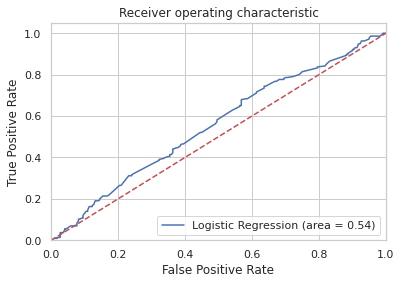

In [ ]:
#ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()